In [84]:
import scanpy as sc
import tcri
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import grimoire as spell
import os

In [85]:
adata = sc.read("/Users/ceglian/data/tcri/renal.h5ad")
adata

AnnData object with n_obs × n_vars = 12293 × 15729
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy-BCT8.3

In [86]:
#any without signed mi were  false
signed_mi          = False
init_ortho         = False
entropy_threshold  = 1.
mutual_information = "/Users/ceglian/Data/tcri/renal_{}_{}.p".format(signed_mi,str(entropy_threshold).replace(".",""))
print(mutual_information)
embedding_size     = 100
alpha              = 0.08
beta               = 0.02
gain               = 10
vector_file        = "/Users/ceglian/Data/tcri/renal_{}_{}_{}_{}_{}_{}.vec".format(embedding_size, alpha, beta, gain, signed_mi, init_ortho)
print(vector_file)
retrain            = True
annotated_h5ad     = "/Users/ceglian/Data/tcri/renal_annotated.h5ad"
device             = "cpu"

/Users/ceglian/Data/tcri/renal_False_10.p
/Users/ceglian/Data/tcri/renal_100_0.08_0.02_10_False_False.vec


In [88]:
genes = [x for x in adata.var.index.tolist()]
genes = [x for x in genes if "TRAV" not in x]
genes = [x for x in genes if "TRAJ" not in x]
genes = [x for x in genes if "TRAD" not in x]


genes = [x for x in genes if "TRBV" not in x]
genes = [x for x in genes if "TRBJ" not in x]
genes = [x for x in genes if "TRBD" not in x]

genes = [x for x in genes if "TRGV" not in x]
genes = [x for x in genes if "TRGJ" not in x]
genes = [x for x in genes if "TRGD" not in x]

genes = [x for x in genes if "TRDV" not in x]
genes = [x for x in genes if "TRDJ" not in x]
genes = [x for x in genes if "TRDD" not in x]
adata = adata[:,genes]

adata = spell.pp.remove_meaningless_genes(adata)
trb = []
for x in adata.obs["CTnt"]:
    trb.append(x.split("_")[0])
adata.obs["trb"] = trb
print(adata)
adata = adata[adata.obs["trb"]!=""]
adata = adata[adata.obs["trb"]!="nan"]
adata = adata[adata.obs["trb"]!="Other"]
adata

AnnData object with n_obs × n_vars = 12293 × 15387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy

View of AnnData object with n_obs × n_vars = 12293 × 15387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 

In [89]:
tcri.pp.gene_entropy(adata)
adata = adata[:,adata.var["entropy"] > entropy_threshold]
adata

100%|██████████| 15387/15387 [00:02<00:00, 6673.74it/s]


View of AnnData object with n_obs × n_vars = 12293 × 325
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'e

In [90]:
tcri.pp.register_clonotype_key(adata,"trb")

In [91]:
dataset = GeneVectorDataset(adata,load_expression=True,signed_mi=signed_mi,device=device)

Running...
Loading Expression.
Indexing expression.


100%|██████████| 2257452/2257452 [00:01<00:00, 1963501.87it/s]

Finished.


In [92]:
import pickle
# if os.path.exists(vector_file):
#     retrain = False
#     print("found previous model.")
if retrain:
    if os.path.exists(mutual_information):
        dataset.mi_scores = pickle.load(open(mutual_information,"rb"))
    print(len(dataset.mi_scores),len(adata.var.index.tolist()))
    cmps = GeneVector(dataset,
                        output_file=vector_file,
                        emb_dimension=embedding_size,
                        gain=gain,
                        init_ortho=init_ortho,
                        device=device)
if not os.path.exists(mutual_information):
    pickle.dump(dict(dataset.mi_scores),open(mutual_information,"wb"))

325 325
*****************
Loading Dataset.
*****************



  0%|          | 0/325 [00:00<?, ?it/s]

100%|██████████| 325/325 [00:00<00:00, 4240.44it/s]


MI Loaded.
Loading Batches for Training.


100%|██████████| 52650/52650 [00:00<00:00, 412620.79it/s]


Ready to train.


**** Epoch 800 	Loss: 39356107.86667
**** Epoch 900 	Loss: 17630769.93333
**** Epoch 1000 	Loss: 6041890.0
**** Epoch 1100 	Loss: 1339699.59375
**** Epoch 1200 	Loss: 137613.07318
**** Epoch 1300 	Loss: 12251.86462
**** Epoch 1400 	Loss: 12878.28076
**** Epoch 1500 	Loss: 15878.69398
**** Epoch 1600 	Loss: 17828.7418
**** Epoch 1700 	Loss: 18916.43301
**** Epoch 1800 	Loss: 19323.90195
**** Epoch 1900 	Loss: 19402.92311
**** Epoch 2000 	Loss: 19489.2082
**** Epoch 2100 	Loss: 19344.37259
**** Epoch 2200 	Loss: 19113.39505
**** Epoch 2300 	Loss: 18973.14082
**** Epoch 2400 	Loss: 19004.0735
**** Epoch 2500 	Loss: 18909.69622
**** Epoch 2600 	Loss: 18653.08665
**** Epoch 2700 	Loss: 18496.20124
**** Epoch 2800 	Loss: 18544.24004
**** Epoch 2900 	Loss: 18570.19036
**** Epoch 3000 	Loss: 18320.48613
**** Epoch 3100 	Loss: 18229.24967
Training complete!
Loading average of 1st and 2nd weights.


100%|██████████| 325/325 [00:00<00:00, 2667610.18it/s]


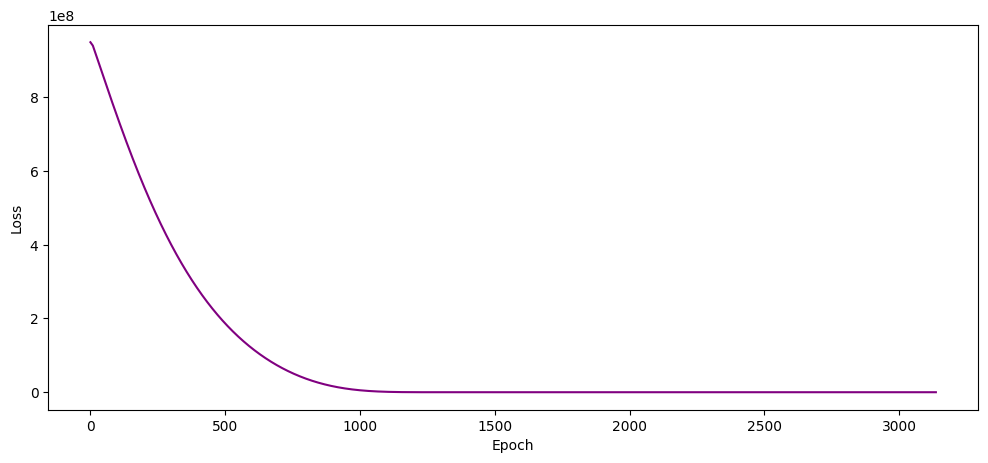

In [94]:
if retrain:
    cmps.train(100000,threshold=1e-3,alpha=alpha, beta=beta, update_interval=100)
    embed = GeneEmbedding(vector_file, dataset, vector="average")
    cmps.plot()

In [95]:
embed = GeneEmbedding(vector_file, dataset, vector="average")
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
adata

Loading average of 1st and 2nd weights.


100%|██████████| 2257452/2257452 [00:01<00:00, 1382767.35it/s]


Generating Cell Vectors.


100%|██████████| 12293/12293 [00:00<00:00, 13869.04it/s]


Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.


AnnData object with n_obs × n_vars = 12293 × 325
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'trb'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2', 'entropy-B

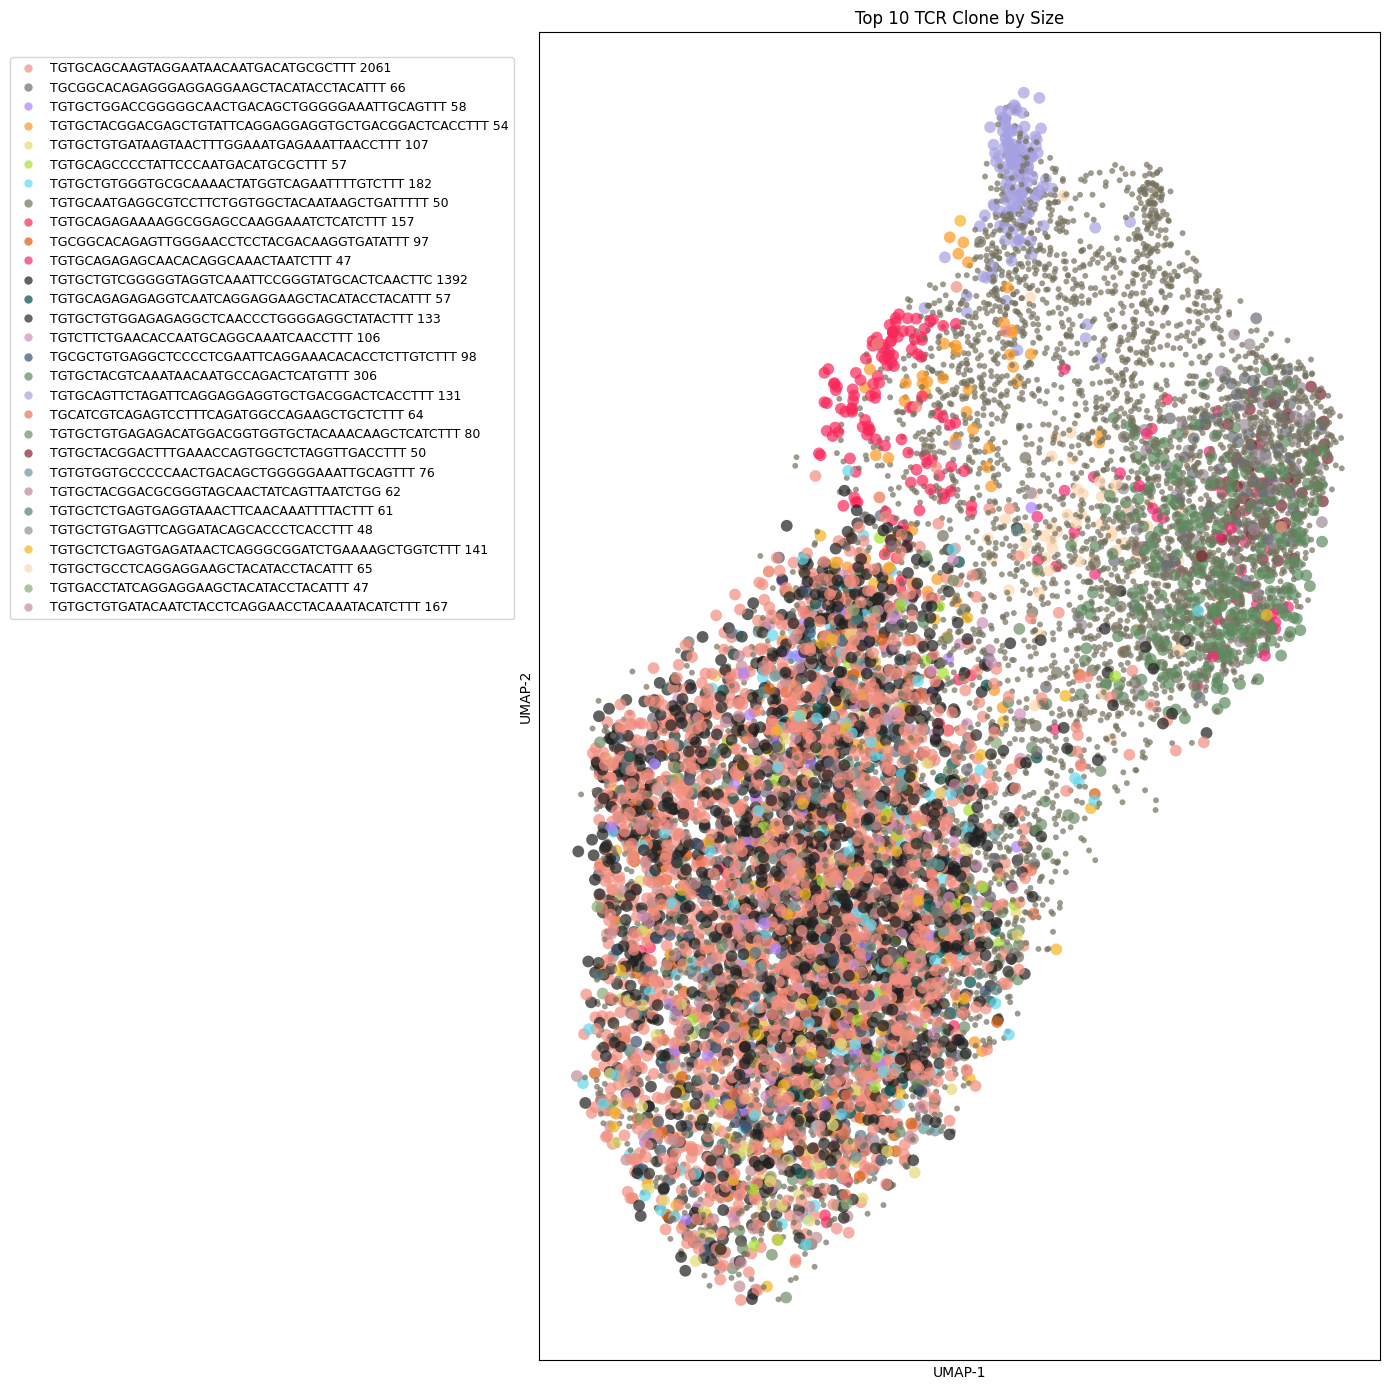

In [96]:
tcri.pl.clone_umap(adata,top_n=30,size=5,figsize=(14,14))

In [97]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

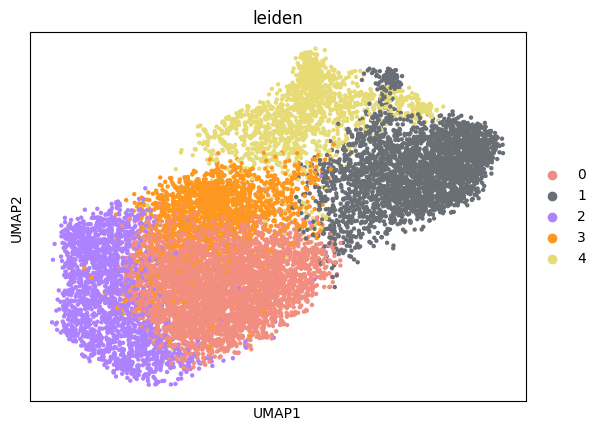

In [98]:
sc.tl.leiden(adata,resolution=0.8)
sc.tl.rank_genes_groups(adata,"leiden")

sc.pl.umap(adata,color="leiden",s=40)

         Falling back to preprocessing with `sc.pp.pca` and default params.


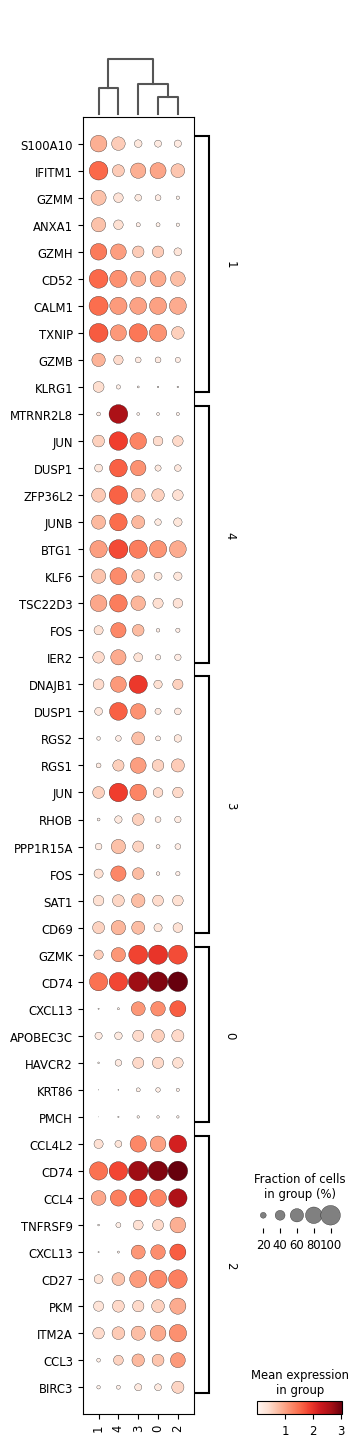

In [99]:
sc.tl.dendrogram(adata,"leiden")
sc.pl.rank_genes_groups_dotplot(adata,min_logfoldchange=1.,swap_axes=True)

In [100]:
markers = dict()
markers["Naive"] = ["IL7R"]
markers["Memory"] = ["GZMK"]
markers["Activated"] = ["GZMB"]
markers["Dysfunctional"] = ["CXCL13"]
adata, dist = cembed.phenotype_probability(adata, markers, method="normalized_exponential", return_distances=True)

Using Normalized Exponential (Temp: 0.05)
Computing similarities for Naive
Markers: IL7R


100%|██████████| 12293/12293 [00:00<00:00, 76846.67it/s]


Computing similarities for Memory
Markers: GZMK


100%|██████████| 12293/12293 [00:00<00:00, 76321.82it/s]


Computing similarities for Activated
Markers: GZMB


100%|██████████| 12293/12293 [00:00<00:00, 75961.56it/s]


Computing similarities for Dysfunctional
Markers: CXCL13


100%|██████████| 12293/12293 [00:00<00:00, 73093.89it/s]


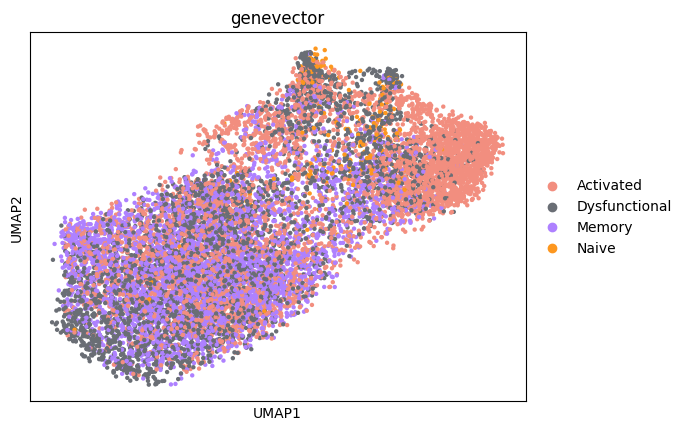

In [103]:
sc.pl.umap(adata,color="genevector",s=40)

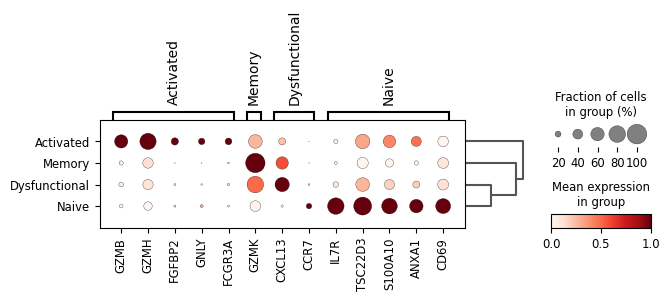

In [104]:
sc.tl.rank_genes_groups(adata,"genevector")
sc.tl.dendrogram(adata,"genevector")
sc.pl.rank_genes_groups_dotplot(adata,min_logfoldchange=1.5,standard_scale='var',n_genes=5,save="gv_degs.pdf")
!cp figures/dotplot_gv_degs.pdf ~

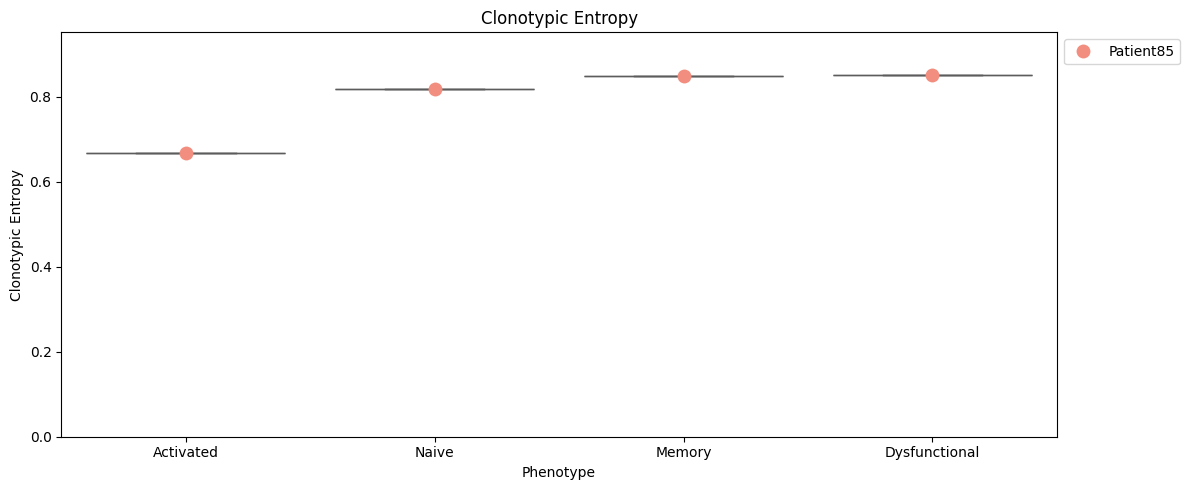

In [118]:
import matplotlib.pyplot as plt
tcri.pp.clone_size(adata)
tcri.pp.register_phenotype_key(adata,"genevector")
responder= adata[adata.obs["Response"] == "Immunotherapy Nonresponsive"]
responder = responder[responder.obs["clone_size"] > 1]
tcri.pl.clonotypic_entropies(responder, normalized=True, groupby="Sample", method='probabilistic')
plt.savefig("/Users/ceglian/renal_clono_no.pdf")

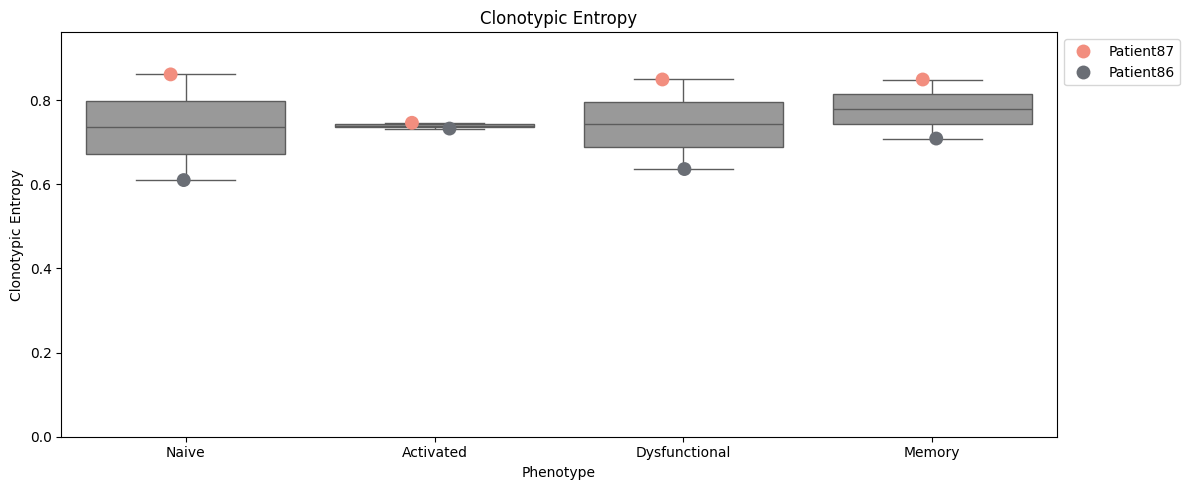

In [124]:
import matplotlib.pyplot as plt
tcri.pp.clone_size(adata)
tcri.pp.register_phenotype_key(adata,"genevector")
responder= adata[adata.obs["Response"] == "Immunotherapy Responsive"]
responder = responder[responder.obs["clone_size"] > 1]
tcri.pl.clonotypic_entropies(responder, normalized=True, groupby="Sample", method='probabilistic')
plt.savefig("/Users/ceglian/renal_clono_yes.pdf")

In [122]:
set(adata.obs["Treatment"])

KeyError: 'Treatment'

In [123]:
set(adata.obs["Cohort"])

{'PRJNA705464', 'PRJNA705465'}